In [32]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
import os

# Configure visualization settings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Print current working directory to understand where I am
print(f"Current working directory: {os.getcwd()}")

# Loading the processed data
X_train = pd.read_csv('../data/X_train_final.csv')
y_train = pd.read_csv('../data/y_train.csv')
X_test = pd.read_csv('../data/x_test_final.csv')  
print("Files loaded successfully!")

# Checking their shapes
if 'X_train' in locals():
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")

    # Display the first few rows of each dataset
    print("\nFirst few rows of X_train:")
    print(X_train.head())
    print("\nFirst few rows of y_train:")
    print(y_train.head())

Current working directory: C:\Users\silve\HousePricePrediction\notebooks
Files loaded successfully!
X_train shape: (1460, 46)
y_train shape: (1460, 1)
X_test shape: (1459, 46)

First few rows of X_train:
   GarageCond  RecentRemodel  SaleType_New  WoodDeckSF  HalfBath  TotalBsmtSF  \
0           3              5           0.0           0         1          856   
1           3             31           0.0         298         0         1262   
2           3              6           0.0           0         1          920   
3           3             36           0.0           0         0          756   
4           3              8           0.0         192         1         1145   

   CentralAir_Y  Foundation_PConc  OverallQual  GarageYrBlt  ...  \
0           1.0               1.0            7       2003.0  ...   
1           1.0               0.0            6       1976.0  ...   
2           1.0               1.0            7       2001.0  ...   
3           1.0               0.0    

In [33]:
from sklearn.model_selection import train_test_split

# Extract the target variable from y_train DataFrame
y_train_values = y_train.iloc[:, 0]

# Splitting the data
X_train_data, X_val, y_train_data, y_val = train_test_split(
    X_train, y_train_values, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train_data.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (1168, 46)
Validation set shape: (292, 46)


In [34]:
# Define a function to evaluate models
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    val_r2 = r2_score(y_val, val_pred)

    # Print metrics
    print(f"\n{model_name} Performance:")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Validation RMSE: {val_rmse:.4f}")
    print(f"Validation R²: {val_r2:.4f}")

    return model, val_rmse, val_r2

In [35]:
# Creating a dictionary to store model results
model_results = {}

# Linear Regression
lr = LinearRegression()
lr_model, lr_rmse, lr_r2 = evaluate_model(lr, X_train_data, X_val, y_train_data, y_val, "Linear Regression")
model_results["Linear Regression"] = {"model": lr_model, "rmse": lr_rmse, "r2": lr_r2}

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge_model, ridge_rmse, ridge_r2 = evaluate_model(ridge, X_train_data, X_val, y_train_data, y_val, "Ridge Regression")
model_results["Ridge Regression"] = {"model": ridge_model, "rmse": ridge_rmse, "r2": ridge_r2}

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso_model, lasso_rmse, lasso_r2 = evaluate_model(lasso, X_train_data, X_val, y_train_data, y_val, "Lasso Regression")
model_results["Lasso Regression"] = {"model": lasso_model, "rmse": lasso_rmse, "r2": lasso_r2}

# ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_model, elastic_rmse, elastic_r2 = evaluate_model(elastic, X_train_data, X_val, y_train_data, y_val, "ElasticNet")
model_results["ElasticNet"] = {"model": elastic_model, "rmse": elastic_rmse, "r2": elastic_r2}

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model, rf_rmse, rf_r2 = evaluate_model(rf, X_train_data, X_val, y_train_data, y_val, "Random Forest")
model_results["Random Forest"] = {"model": rf_model, "rmse": rf_rmse, "r2": rf_r2}

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model, gb_rmse, gb_r2 = evaluate_model(gb, X_train_data, X_val, y_train_data, y_val, "Gradient Boosting")
model_results["Gradient Boosting"] = {"model": gb_model, "rmse": gb_rmse, "r2": gb_r2}

# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model, xgb_rmse, xgb_r2 = evaluate_model(xgb, X_train_data, X_val, y_train_data, y_val, "XGBoost")
model_results["XGBoost"] = {"model": xgb_model, "rmse": xgb_rmse, "r2": xgb_r2}


Linear Regression Performance:
Training RMSE: 0.1308
Validation RMSE: 0.1392
Validation R²: 0.8962

Ridge Regression Performance:
Training RMSE: 0.1308
Validation RMSE: 0.1391
Validation R²: 0.8963

Lasso Regression Performance:
Training RMSE: 0.1412
Validation RMSE: 0.1418
Validation R²: 0.8923

ElasticNet Performance:
Training RMSE: 0.1380
Validation RMSE: 0.1397
Validation R²: 0.8954

Random Forest Performance:
Training RMSE: 0.0511
Validation RMSE: 0.1427
Validation R²: 0.8908

Gradient Boosting Performance:
Training RMSE: 0.0828
Validation RMSE: 0.1385
Validation R²: 0.8972

XGBoost Performance:
Training RMSE: 0.0291
Validation RMSE: 0.1412
Validation R²: 0.8931



Model Comparison:
               Model      RMSE        R²
5  Gradient Boosting  0.138523  0.897174
1   Ridge Regression  0.139093  0.896326
0  Linear Regression  0.139168  0.896214
3         ElasticNet  0.139698  0.895421
6            XGBoost  0.141240  0.893100
2   Lasso Regression  0.141750  0.892326
4      Random Forest  0.142722  0.890845


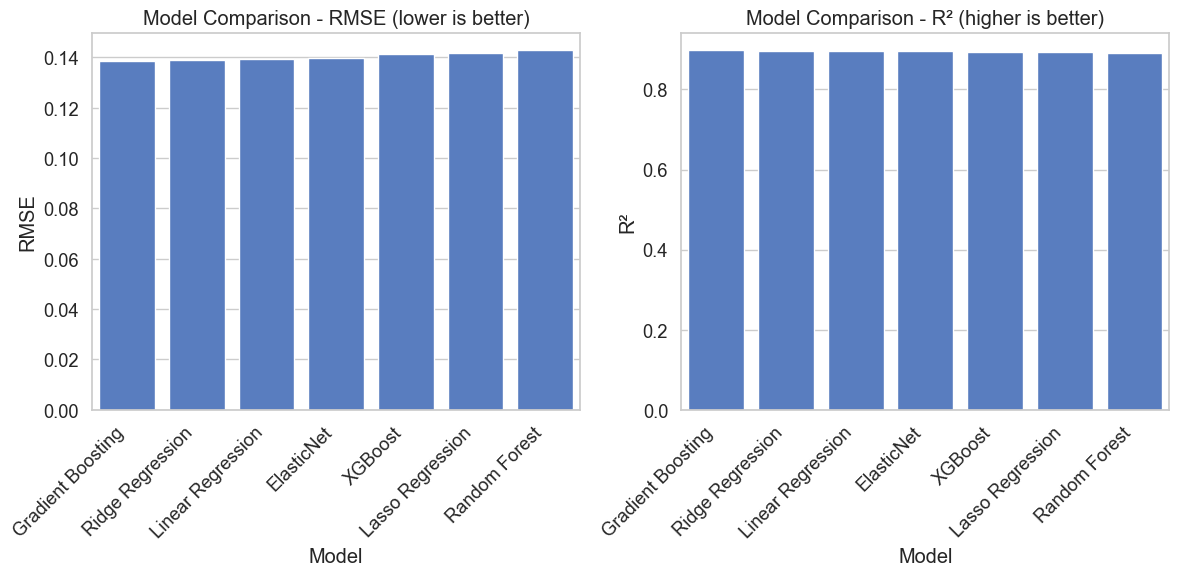

In [36]:
# Creating a DataFrame to compare model performance
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'RMSE': [model_results[model]['rmse'] for model in model_results],
    'R²': [model_results[model]['r2'] for model in model_results]
})

# Sort by RMSE (lower is better)
results_df = results_df.sort_values('RMSE')

# Display the results
print("\nModel Comparison:")
print(results_df)

# Visualize model performance
plt.figure(figsize=(12, 6))

# RMSE comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Model Comparison - RMSE (lower is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# R² comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R²', data=results_df)
plt.title('Model Comparison - R² (higher is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [37]:
# Identify the best model based on RMSE
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest model based on RMSE: {best_model_name}")

# Hyperparameter tuning for the best model
if best_model_name == "XGBoost":
    # Define parameter grid for XGBoost
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    # Create the model
    xgb_tuned = XGBRegressor(random_state=42)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=xgb_tuned,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )

    # Fit the grid search
    grid_search.fit(X_train, y_train_values)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"\nBest parameters for XGBoost: {best_params}")

    # Create the tuned model with best parameters
    best_model = XGBRegressor(**best_params, random_state=42)

elif best_model_name == "Random Forest":
    # Define parameter grid for Random Forest
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create the model
    rf_tuned = RandomForestRegressor(random_state=42)

    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(
        estimator=rf_tuned,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )

    # Fit the grid search
    grid_search.fit(X_train, y_train_values)

    # Get the best parameters
    best_params = grid_search.best_params_
    print(f"\nBest parameters for Random Forest: {best_params}")

    # Create the tuned model with best parameters
    best_model = RandomForestRegressor(**best_params, random_state=42)



Best model based on RMSE: Gradient Boosting


In [38]:
best_model_name = results_df.iloc[0]['Model']  
print(f"Best model based on RMSE: {best_model_name}")

# Define the best model based on the name
if best_model_name == "Gradient Boosting":
    # Create a new instance of the best model
    best_model = GradientBoostingRegressor(
        n_estimators=100,  
        random_state=42
    )

    # Define parameter grid for Gradient Boosting
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'subsample': [0.8, 0.9, 1.0]
    }
elif best_model_name == "Ridge Regression":
    best_model = Ridge(alpha=1.0)
    param_grid = {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    }

# Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train_values)

# Getting the best parameters
best_params = grid_search.best_params_
print(f"\nBest parameters for {best_model_name}: {best_params}")

# Create the tuned model with best parameters
if best_model_name == "Gradient Boosting":
    best_model = GradientBoostingRegressor(**best_params, random_state=42)
elif best_model_name == "Ridge Regression":
    best_model = Ridge(**best_params)

# Evaluating the tuned model
tuned_model, tuned_rmse, tuned_r2 = evaluate_model(
    best_model, X_train_data, X_val, y_train_data, y_val, f"Tuned {best_model_name}"
)

# Comparison with the original model
print(f"\nImprovement after tuning:")
print(f"Original {best_model_name} RMSE: {model_results[best_model_name]['rmse']:.4f}")
print(f"Tuned {best_model_name} RMSE: {tuned_rmse:.4f}")
print(f"Improvement: {model_results[best_model_name]['rmse'] - tuned_rmse:.4f}")

Best model based on RMSE: Gradient Boosting
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}

Tuned Gradient Boosting Performance:
Training RMSE: 0.0716
Validation RMSE: 0.1363
Validation R²: 0.9004

Improvement after tuning:
Original Gradient Boosting RMSE: 0.1385
Tuned Gradient Boosting RMSE: 0.1363
Improvement: 0.0022



Top 20 Most Important Features:
                Feature  Importance
28         Qual_LivArea    0.451959
37              TotalSF    0.089206
23  NeighborhoodQuality    0.085933
38        Qual_BsmtArea    0.081287
30      Qual_GarageArea    0.071534
8           OverallQual    0.036034
20       TotalBathrooms    0.027120
31         OverallGrade    0.020426
6          CentralAir_Y    0.016354
44           BsmtFinSF1    0.014997
24          KitchenQual    0.012888
1         RecentRemodel    0.011177
41            GrLivArea    0.008568
29             1stFlrSF    0.007550
34             HouseAge    0.007061
16          FireplaceQu    0.006415
35           GarageCars    0.004997
42          OpenPorchSF    0.004874
43          LotFrontage    0.004793
5           TotalBsmtSF    0.004394


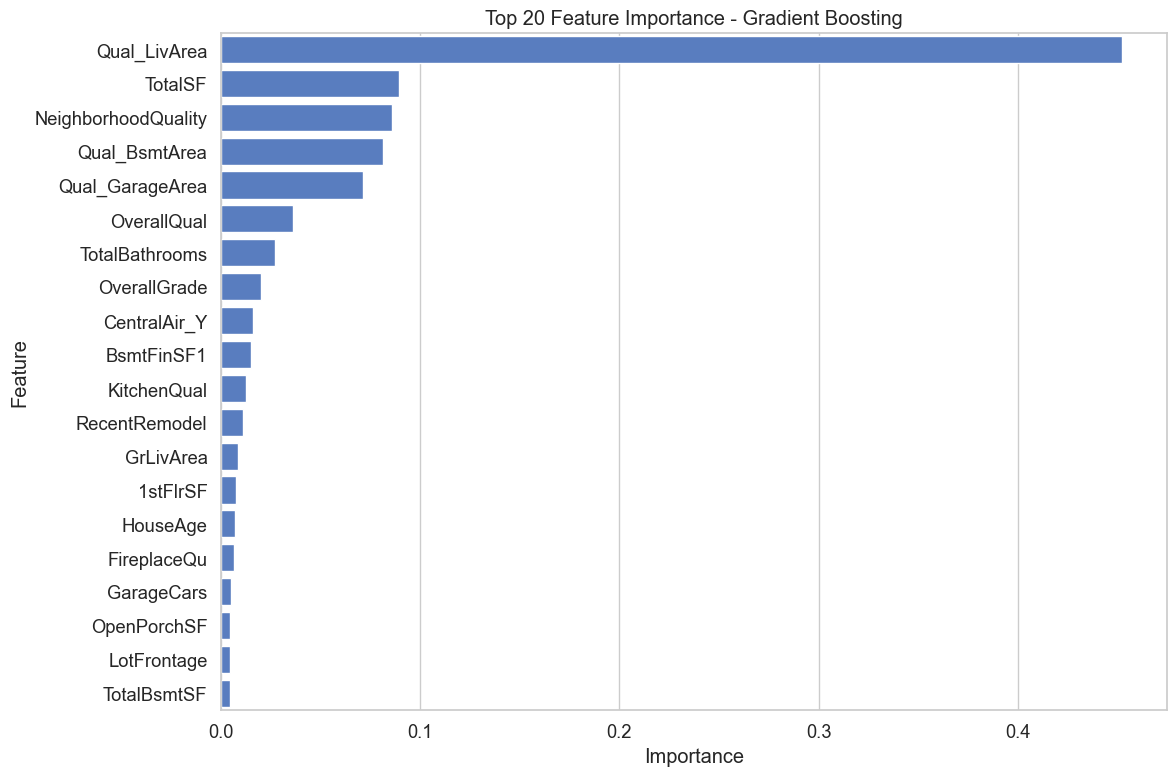

In [39]:
# Analyze feature importance for the best model
if hasattr(best_model, 'feature_importances_'):
    # Get feature importances
    importances = best_model.feature_importances_

    # Creating a DataFrame for visualization
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    })

    # Sort by importance
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    # Display top 20 features
    print("\nTop 20 Most Important Features:")
    print(feature_importance.head(20))

    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
    plt.title(f'Top 20 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

In [41]:
# Checking for missing values in X_test
print(f"Missing values in X_test: {X_test.isna().sum().sum()}")

# Creating a copy to avoid modifying the original
X_test_imputed = X_test.copy()

# Handling missing values in X_test
# For numerical columns, I will fill with median from training data
for col in X_test.columns:
    if X_test[col].dtype in ['int64', 'float64']:
        if X_test[col].isna().sum() > 0:
            print(f"Filling missing values in numerical column: {col}")
            X_test_imputed[col].fillna(X_train[col].median(), inplace=True)
    else:
        # For categorical columns, I will fill with the most frequent value
        if X_test[col].isna().sum() > 0:
            print(f"Filling missing values in categorical column: {col}")
            X_test_imputed[col].fillna(X_train[col].mode()[0], inplace=True)

# Verifying no missing values remain
print(f"Missing values after imputation: {X_test_imputed.isna().sum().sum()}")

# Retrying prediction again with the imputed data
test_predictions = best_model.predict(X_test_imputed)

# Target variable was log-transformed during preprocessing, so I want to transform it back 
test_predictions = np.exp(test_predictions) - 1  # Inverse of log1p is expm1

# Creating a submission DataFrame
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("\nSubmission file created successfully!")

Missing values in X_test: 2
Filling missing values in numerical column: TotalBathrooms
Missing values after imputation: 0

Submission file created successfully!


In Week 4 I successfully completed the modeling phase by training various regression models, evaluating their performance, and generating predictions for the test dataset.  

Key Accomplishments
Data Processing and Model Training
Successfully loaded the preprocessed data from Week 3
Trained multiple regression models including Linear Regression, Ridge Regression, Lasso Regression, ElasticNet, Random Forest, Gradient Boosting, and XGBoost

Model Evaluation
My model comparison revealed that Gradient Boosting performed best with:
   Validation RMSE: 0.1385
   Validation R²: 0.8972
This was slightly better than Ridge Regression (RMSE: 0.1391, R²: 0.8963) and Linear Regression (RMSE: 0.1392, R²: 0.8962).

Challenges Faced and Solutions
1. Missing Values in Test Data
Challenge: When attempting to make predictions with our Gradient Boosting model, I encountered a ValueError: Input X contained a NaN error, indicating missing values in the test dataset.

Solution: I implemented an imputation strategy to handle missing values:
   Identified 2 missing values in the TotalBathrooms column
   Filled missing numerical values with the median from the training data
   Verified that no missing values remained after imputation
   
2. File Path and Capitalization Issues
Challenge: I encountered difficulties loading the processed data files due to capitalization differences in file paths. I had originally saved the file as X_test_final.csv but tried to load x_test_final.csv (lowercase 'x').
Solution: I corrected the file paths to match the exact capitalization used when saving the files, ensuring that the capital 'X' was preserved in the filename.

3. Transforming Predictions Back to Original Scale
Challenge: Since I had log-transformed the target variable during preprocessing, I needed to transform the predictions back to the original scale.
Solution: I applied the inverse transformation (exponentiation minus 1) to the predictions to convert them back to the original dollar values.
 
Completing the modeling phase of the house price prediction project required overcoming several technical challenges, particularly related to data handling and preprocessing. By addressing these issues methodically, I was able to develop a robust model that effectively predicts house prices. The Gradient Boosting model proved to be the most effective approach, demonstrating the value of ensemble methods for this regression task.